# Project 5: Wrangling and Analyzing "WeRateDogs" Twitter Data
By: Deepak Nandipati

## Project Overview
The purpose of this project is to utilze data wrangling and cleaning skills to sort tweet archive of Twitter page "WeRateDogs" and by username @dog_rates. There are several steps to follow in order to gather the required data, most of the data was provided by Udacity.

### Tasks include:
> - Gathering data from sources
> - Assessing and Cleaning Data
> - Storing, analyzing and visualizing the wrangled data
> - Reporting the wrangling efforts, data analyses and visualizations


### Gathering data

> - **Twitter archive file:** File was provided from Udacity as "twitter_archive_enhanced.csv"
> - **Tweet image predictions:** File was hosted on Udacity's servers and was pulled from server using Request function. URL is as follows: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
> - **Twitter API and JSON:** Acquired the consumer key/secret along with access token and secret from Twitter Dev. Using tweepy function, data was extracted to this notebook.

---

## Importing packages

In [1]:
import pandas as pd       # manipulating dataframes
import numpy as np        # array computing
import sqlalchemy         # interacting with databases

import requests           # to download files from web

# Accessing API
import tweepy             # API keys in config.py (local file)
import config             
import json               # encoding and decoding JSON data
from timeit import default_timer as timer

#Data visualization packages
import matplotlib.pyplot as plt       
import seaborn as sns

## Importing data

> 1.  **Twitter archive file** <br>
> 2. **Tweet image predictions**<br>
> 3. **Twitter API and JSON**

### 1. Importing Twitter Archive Data

In [2]:
#Code
df = pd.read_csv('twitter-archive-enhanced.csv')

#### Assessing data

In [3]:
print(df.shape); df.info()

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), i

In [4]:
df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
df.rating_denominator.value_counts() #As we can see, the denominators are not consistent. Need to drop != 10

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [6]:
(df.rating_denominator != 10).sum() 
#23 rows of data need to be removed. As the number is small, it will not distort overall results

23

In [7]:
print(df.isnull().sum()); #null values present in several columns; need to be fixed
df.isnull().any()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

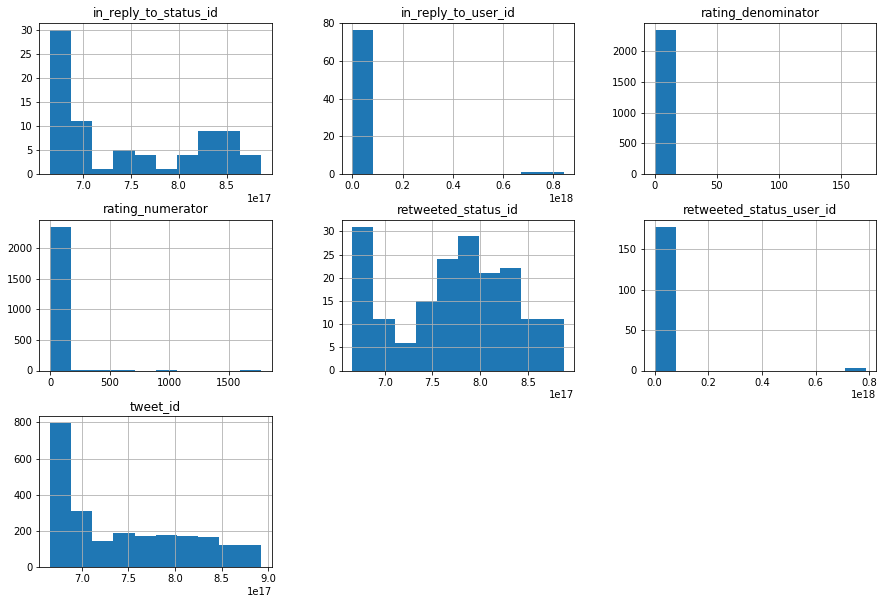

In [8]:
df.hist(figsize=(15,10)); 

### Assessment Summary:

**Data Quality Issues to Fix** <br>
> - Denominator needs to be 10 for consistency and there are 23 cases in which the denominator is either greater or less than 10; 23 data points is a smaller number in relation to whole data. We can drop these.
> - Remove rows with retweets or responses and delete column
> - Replace str 'NaN' with dataType error NaN
> - There are 181 retweets which need to be removed. 
> - Need to delete duplicate values
> - Drop values of 'name' that do not correspond to a dog name
> - Numerators need to be rectified for outliers and float values
> - Id names should be converted to string variable
> - Remove duplicate values such as the retweets and tweet replies

**Tidiness Issues**
> - All tables need to be merged to a single dataset
> - Merging of dog stages into a singular column

### 2. Importing Twitter Image Data

In [9]:
# Saving URL of twitter images in variable
picURL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

resp = requests.get(picURL) #using requests to extract data

# writing to local drive
with open('images.tsv', 'wb') as file: 
    file.write(resp.content)

# reading tsv file and seperate data
df_written = pd.read_csv('images.tsv', sep='\t')

#### Assessing Data

In [10]:
print(df_written.dtypes);
print(df_written.info());
df_written.head(10)

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_written.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Assessment Summary:

**Data Quality Issues to Fix** <br>
> - p2_dog and p3_dog columns with low probability of being dog should also be removed from dataset
> - Remove any duplicate data
> - convert tweet id to string

### 3. Importing Twitter API

### Requesting API keys from Twitter Developer account
>  1. Save keys and tokens in a python file named 'config'
>  2. Import these to notebook and get data
>  3. Hide config.py from public as it contains API keys, secrets, and tokens

Ref: http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html <br>
Ref: http://docs.tweepy.org/en/v3.5.0/api.html#tweepy-api-twitter-api-wrapper

In [12]:
#importing data using tweepy function

auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret) 
auth.set_access_token(config.access_token, config.access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True) 


In [13]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [14]:
# NOTE: This loop will likely take 30-40 minutes to run because of Twitter's rate limit; extracting data and saving it 
# in text format: 'tweet_json.txt';
# Currently commented out, as it was run before already. Uncomment before running it.
'''
count = 0
errArray = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            errArray[tweet_id] = e
            pass
            
end = timer()

print(end - start)
print(errArray)
'''

'\ncount = 0\nerrArray = {}\nstart = timer()\n\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    \n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            errArray[tweet_id] = e\n            pass\n            \nend = timer()\n\nprint(end - start)\nprint(errArray)\n'

In [15]:
# reads tweets from array
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

In [16]:
# read tweets in text file from json format and save columns
df_api=pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [17]:
print(df_api.shape)
df_api.head()

(2337, 27)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8178,37522,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6053,32252,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4004,24301,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8330,40853,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9028,39064,False,False,False,False,en


In [18]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 27 columns):
created_at                       2337 non-null object
id                               2337 non-null int64
id_str                           2337 non-null object
full_text                        2337 non-null object
truncated                        2337 non-null bool
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
source                           2337 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2337 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [19]:
df_api.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [20]:
# refine data to what is needed. Making 2 columns: retweet counts and favourite counts
df_resp = df_api[['id', 'retweet_count', 'favorite_count']]
df_resp.head()

,id,retweet_count,favorite_count
0,892420643555336193,8178,37522
1,892177421306343426,6053,32252
2,891815181378084864,4004,24301
3,891689557279858688,8330,40853
4,891327558926688256,9028,39064


#### Assessing Data

In [21]:
print(df_resp.shape); df_resp.head(5) 

(2337, 3)


,id,retweet_count,favorite_count
0,892420643555336193,8178,37522
1,892177421306343426,6053,32252
2,891815181378084864,4004,24301
3,891689557279858688,8330,40853
4,891327558926688256,9028,39064


In [22]:
df_resp.nunique() #all id's are unique; no duplicates

id                2337
retweet_count     1692
favorite_count    2006
dtype: int64

In [23]:
df_resp.info(); df_resp.isnull().sum() #no null values present here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


id                0
retweet_count     0
favorite_count    0
dtype: int64

In [24]:
df_resp.describe()

,id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2874.751819,7837.951647
std,6.824243e+16,4856.315531,12150.121179
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,579.000000,1358.000000
50%,7.185406e+17,1344.000000,3416.000000
75%,7.986825e+17,3350.000000,9597.000000
max,8.924206e+17,82375.000000,162061.000000


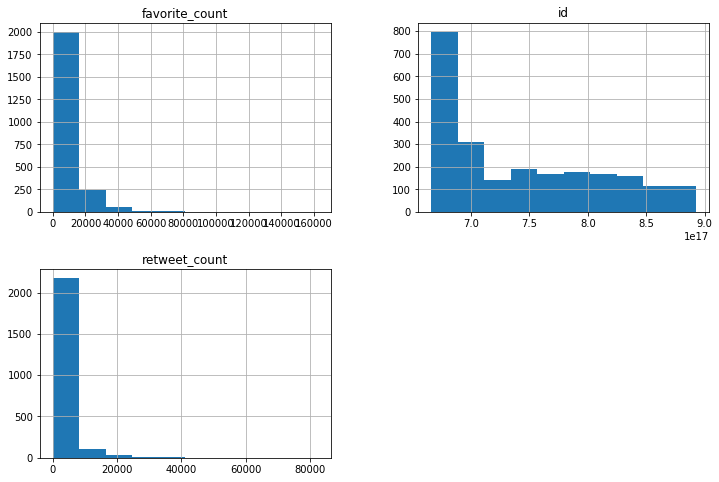

In [25]:
df_resp.hist(figsize=(12,8));

### Assessment Summary:

- Need to merge dataframes and drop any duplicates present
- Convert id to string

## Data Cleaning

#### Cleaned Dataframes:
- **df_clean** = Twitter archive data
- **df_written_clean** = Twitter Image Prediction <br>
- **df_resp_clean** = Twitter API data with only retweets and favourite count <br>


### 1) Twitter Archive Data

### Assessment Summary:

**Data Quality Issues to Fix** <br>
> - Denominator needs to be 10 for consistency and there are 23 cases in which the denominator is either greater or less than 10; 23 data points is a smaller number in relation to whole data. We can drop these.
> - Remove rows with retweets or responses and delete column
> - Replace str 'NaN' with dataType error NaN
> - There are 181 retweets which need to be removed. 
> - Need to delete duplicate values
> - Drop values of 'name' that do not correspond to a dog name
> - Numerators need to be rectified for outliers and float values
> - Id names should be converted to string variable
> - Remove duplicate values such as the retweets and tweet replies

**Tidiness Issues**
> - All tables need to be merged to a single dataset
> - Merging of dog stages into a singular column

#### Copy data sets for cleaning

In [26]:
df_clean = df.copy() #twitter_enhanced data copy

### Define
Removing duplicated data and changing data type, and appropriating numerators/denominators of dataset and normalizing denominators to equal only 10

### Code

In [27]:
df_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [28]:
#Code
df_clean.drop_duplicates(subset='text', keep="first", inplace=True)

In [29]:
#example of error in numerators, originally it is 9.75 according to the page: https://t.co/yBO5wuqaPS
df_clean.query('tweet_id == 786709082849828864')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


Extracting actual numerator and denominator value from text and saving numerator with decimal values and denominator as integer into a new variable

In [30]:
ratings = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True) 

In [31]:
ratings.query('index == 695') #decimal value - Good 

,0,1
695,9.75,10


Updating to df_clean set

In [32]:
df_clean['rating_numerator'] = ratings[0]
df_clean['rating_denominator'] = ratings[1]

Converting data types

In [33]:
df_clean['rating_numerator']=df_clean.rating_numerator.astype('float')
df_clean['rating_denominator']=df_clean.rating_denominator.astype('float')

In [34]:
#checking denonimator values
print(df_clean.rating_denominator.value_counts());
print((df.rating_denominator != 10).sum()) #23 data values - we can remove these

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64
23


In [35]:
df_clean = df_clean.query('rating_denominator == 10') #dropping denominators != 10

### Test

In [36]:
df_clean.rating_denominator.value_counts() #all denominators are equal to 10

10.0    2333
Name: rating_denominator, dtype: int64

In [37]:
df_clean.query('tweet_id == 786709082849828864')['rating_numerator'] #value rectified

695    9.75
Name: rating_numerator, dtype: float64

In [38]:
df_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Define
Clean columns replacing None and NaN values to empty strings

### Code

In [39]:
#before
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None


In [40]:
df_clean.doggo.replace('None', '', inplace=True)
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.name.replace('None', '', inplace=True)
df_clean.name.replace(np.NaN, '', inplace=True)


### Test

In [41]:
#after
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,


### Define
Merge dog stages to one column and drop columns: <br>'doggo','floofer','pupper','puppo'

### Code

In [42]:
print(df_clean.doggo.value_counts());
print(df_clean.floofer.value_counts());
print(df_clean.pupper.value_counts());
print(df_clean.puppo.value_counts());

         2236
doggo      97
Name: doggo, dtype: int64
           2323
floofer      10
Name: floofer, dtype: int64
          2076
pupper     257
Name: pupper, dtype: int64
         2303
puppo      30
Name: puppo, dtype: int64


There are cases where there are multiple dog stages in a row

In [43]:
df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1953
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [44]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [45]:
drop_dogtype = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean = df_clean.drop(drop_dogtype, axis=1)

### Test

In [46]:
df_clean.stage.value_counts()

                 1953
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [47]:
df_clean.head(10)['stage']

0         
1         
2         
3         
4         
5         
6         
7         
8         
9    doggo
Name: stage, dtype: object

### Define
Removing values that do not correspond to a dog name

### Code

In [48]:
df_clean.name.sort_values(ascending=False)

1385            very
1031            very
1097            very
773             very
819             very
1121    unacceptable
2212             the
1527             the
1815             the
1603             the
1797             the
2345             the
2346             the
2037             the
22              such
2030           space
193            quite
2326           quite
169            quite
118            quite
993              one
1936             one
369              one
924              one
1206             old
1747      officially
335              not
988              not
852               my
1095             mad
            ...     
998                 
1019                
1018                
1016                
1015                
1012                
1010                
1009                
1008                
1005                
1966                
1001                
1000                
999                 
996                 
949                 
995          

In [49]:
df_clean[df_clean['name'].str.islower()]['name'] 
#it looks like the lowercase values do not pertain to a name
#as it adds to 106 values, I will delete them from dataframe

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2161             a
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2345        

In [50]:
df_clean['name'].sort_values() #it appears that the lower case values do not pertain to a name; lets verify

2355                
1979                
956                 
958                 
960                 
1978                
967                 
968                 
973                 
982                 
1972                
990                 
1969                
995                 
949                 
996                 
999                 
1000                
1001                
1966                
1005                
1008                
1009                
1010                
1012                
1015                
1016                
1018                
1019                
998                 
            ...     
1095             mad
852               my
988              not
335              not
1747      officially
1206             old
924              one
369              one
1936             one
993              one
118            quite
169            quite
2326           quite
193            quite
2030           space
22              such
2037         

In [51]:
name_drop = df_clean.loc[(df_clean['name'].str.islower())]['tweet_id'].index
df_clean.drop(name_drop, inplace=True) #dropping non-dog names

### Test

In [52]:
df_clean.name.sort_values #looks good

<bound method Series.sort_values of 0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
5                 
6              Jax
7                 
8             Zoey
9           Cassie
10            Koda
11           Bruno
12                
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
23          Canela
24                
25                
26            Maya
27          Mingus
28           Derek
29          Roscoe
30                
           ...    
2310              
2312         Josep
2313         Lugan
2315    Christoper
2316              
2317       Jimothy
2318      Kreggory
2319         Scout
2320              
2321              
2322              
2323              
2324              
2325        Walter
2328              
2329              
2330              
2331              
2332              
2336          

In [53]:
df_clean.loc[(df_clean['name'].str.islower())].sum() #None

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
stage                         0.0
dtype: float64

In [54]:
df_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
stage                          object
dtype: object

### Define
converting dtypes or retweets, replies and tweet_id and removing rows with retweets or responses

### Code

In [55]:
#convert to str
df_clean["in_reply_to_status_id"] = df_clean["in_reply_to_status_id"].astype(str)
df_clean["retweeted_status_id"] = df_clean["retweeted_status_id"].astype(str)
df_clean['tweet_id'] = df_clean.tweet_id.astype(str)

In [56]:
#changing columns replacing 'None' and 'NaN' values to empty strings

df_clean.in_reply_to_status_id.replace('nan', '', inplace=True)
df_clean.in_reply_to_status_id.replace(np.NaN, '', inplace=True)

df_clean.retweeted_status_id.replace('nan', '', inplace=True)
df_clean.retweeted_status_id.replace(np.NaN, '', inplace=True)

df_clean.in_reply_to_user_id.replace('nan', '', inplace=True)
df_clean.in_reply_to_user_id.replace(np.NaN, '', inplace=True)

df_clean.retweeted_status_user_id.replace('nan', '', inplace=True)
df_clean.retweeted_status_user_id.replace(np.NaN, '', inplace=True)

df_clean.retweeted_status_timestamp.replace('nan', '', inplace=True)
df_clean.retweeted_status_timestamp.replace(np.NaN, '', inplace=True)

In [57]:
print(df_clean[df_clean["in_reply_to_status_id"] != '']["tweet_id"].count()) #73 values that need to be deleted
replies = df_clean[df_clean["in_reply_to_status_id"] != '']["tweet_id"].index

print(df_clean[df_clean["retweeted_status_id"] != '']["tweet_id"].count()) #175 values that need to be deleted
retweets = df_clean[df_clean["retweeted_status_id"] != '']["tweet_id"].index



73
175


In [58]:
#dropping these values
df_clean.drop(replies, inplace=True)
df_clean.drop(retweets, inplace=True)

### Test

In [59]:
df_clean.head() #columns of 'nan' replaced with blanks

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,,,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,,,,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,,,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,,,,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,,,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,,,,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,,,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,,,,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,,,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,,,,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,


In [60]:
print(df_clean[df_clean["in_reply_to_status_id"] != '']["tweet_id"].count()) 
print(df_clean[df_clean["retweeted_status_id"] != '']["tweet_id"].count()) 

0
0


In [61]:
print(df_clean.shape);
df_clean.dtypes #looks good for merging

(1979, 14)


tweet_id                       object
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
stage                          object
dtype: object

---

## 2) Twitter Image Prediction

### Assessment Summary:

**Data Quality Issues to Fix** <br>
> - p2_dog and p3_dog columns with low probability of being dog should also be removed from dataset
> - Remove any duplicate data
> - Change column names
> - Keep only data pertaining to dogs and drop other animals/objects

#### Copying Data

In [62]:
df_written_clean = df_written.copy() #twitter image prediction copy

### Define
Converting data types

### Code

In [63]:
df_written_clean['tweet_id'] = df_written_clean.tweet_id.astype(str)

### Test

In [64]:
df_written_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
Removing p1 == False (non-dog data) and p2_dog/p3_dog columns with low probability of being dog 

### Code

In [65]:
#dropping all data that are not dogs
df_written_clean = df_written_clean.query('p1_dog == True')

In [66]:
#storing low probability of being dogs in a variable
lowprobability_of_beingdog = df_written_clean[(df_written_clean["p2_conf"] < 0.15) &
                                              (df_written_clean["p3_conf"] < 0.15)]["tweet_id"].index

In [67]:
#dropping the low-probability of data
df_written_clean.drop(lowprobability_of_beingdog, inplace=True) 

### Test

In [68]:
df_written_clean.query('p1_dog == False') #all false values deleted

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
print(df_written_clean.query('p2_conf < 0.15 & p3_conf < 0.15')) #empty dataframe

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []


In [70]:
# check for not dogs entry
assert len(df_written_clean[(df_written_clean["p1_dog"] == False)]) == 0
print("Not Dog columns Deleted")
#assert function outputed no errors thus we can confirm that these columns have been deleted

Not Dog columns Deleted


In [71]:
# Function below will print if the variable lowprobability_of_beingdog is actually deleted from df_clean
try:
    df_written_clean[lowprobability_of_beingdog]
except KeyError:
    print('Columns SuccessFully Deleted')
# it has, indicating that the df has been clean from this variable

Columns SuccessFully Deleted


In [72]:
# Check probably not dogs
assert len(df_written_clean[(df_written_clean["p1_dog"] == False) &
                            (df_written_clean["p2_conf"] < 0.2) &
                            (df_written_clean["p3_conf"] < 0.2)]) == 0

print("Successfully deleted low probability dogs")

Successfully deleted low probability dogs


### Define
Change column names for easier reading

### Code

In [73]:
print(df_written_clean.info());
df_written_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 2070
Data columns (total 12 columns):
tweet_id    665 non-null object
jpg_url     665 non-null object
img_num     665 non-null int64
p1          665 non-null object
p1_conf     665 non-null float64
p1_dog      665 non-null bool
p2          665 non-null object
p2_conf     665 non-null float64
p2_dog      665 non-null bool
p3          665 non-null object
p3_conf     665 non-null float64
p3_dog      665 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 53.9+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [74]:
df_written_clean.rename({"p1": "1stconfident_dog_breed","p2": "2ndconfident_dog_breed", "p3":"3rdconfident_dog_breed"}, axis=1, inplace=True)

### Test

In [75]:
df_written_clean.head()

,tweet_id,jpg_url,img_num,1stconfident_dog_breed,p1_conf,p1_dog,2ndconfident_dog_breed,p2_conf,p2_dog,3rdconfident_dog_breed,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [76]:
df_written_clean.columns #need to drop columns jph_url, img_num after merging

Index(['tweet_id', 'jpg_url', 'img_num', '1stconfident_dog_breed', 'p1_conf',
       'p1_dog', '2ndconfident_dog_breed', 'p2_conf', 'p2_dog',
       '3rdconfident_dog_breed', 'p3_conf', 'p3_dog'],
      dtype='object')

---

## 3) Twitter API Data

### Assessment Summary:

- Need to merge dataframes and drop any duplicates present
- change column 'id' to 'tweet_id' 
- convert 'tweet_id' to str

#### Copying Data

In [77]:
df_resp_clean = df_resp.copy() #twitter image prediction copy

### Define
Change data types and rename columns

### Code

In [78]:
df_resp_clean.rename({"id": "tweet_id"}, axis=1, inplace=True)

In [79]:
df_resp_clean['tweet_id'] = df_resp_clean.tweet_id.astype('str')

### Test

In [80]:
df_resp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [81]:
# Verifying column name change

if df_resp_clean.columns[0] == "tweet_id":
    print("Columns remaned successfully")


Columns remaned successfully


In [82]:
df_resp_clean.duplicated().sum()

0

---

## Merging DataFrames

### Define
Merging all three dataframes

### Code

In [83]:
df_temp = df_clean.merge(df_resp_clean, how='inner', on='tweet_id')
df_temp.drop_duplicates(inplace=True)

In [84]:
df_master = df_temp.merge(df_written_clean, how='inner', on='tweet_id')
df_master.drop_duplicates(inplace=True)

### Test

In [85]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', '1stconfident_dog_breed',
       'p1_conf', 'p1_dog', '2ndconfident_dog_breed', 'p2_conf', 'p2_dog',
       '3rdconfident_dog_breed', 'p3_conf', 'p3_dog'],
      dtype='object')

In [86]:
# making sure ids are consistent across data by removing rows where id does not appear in all dataframes.
# eg.removed ids from df_written not appear in other dataframes
if not df_master.duplicated().sum():
    print('Merge new dataframes successful')


Merge new dataframes successful


In [87]:
print(df_master.shape); print(df_master.info()); df_master.head()

(597, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 596
Data columns (total 27 columns):
tweet_id                      597 non-null object
in_reply_to_status_id         597 non-null object
in_reply_to_user_id           597 non-null object
timestamp                     597 non-null object
source                        597 non-null object
text                          597 non-null object
retweeted_status_id           597 non-null object
retweeted_status_user_id      597 non-null object
retweeted_status_timestamp    597 non-null object
expanded_urls                 597 non-null object
rating_numerator              597 non-null float64
rating_denominator            597 non-null float64
name                          597 non-null object
stage                         597 non-null object
retweet_count                 597 non-null int64
favorite_count                597 non-null int64
jpg_url                       597 non-null object
img_num                       597 n

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,1stconfident_dog_breed,p1_conf,p1_dog,2ndconfident_dog_breed,p2_conf,p2_dog,3rdconfident_dog_breed,p3_conf,p3_dog
0,891327558926688256,,,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,,,,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1,890971913173991426,,,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,,,,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2,890729181411237888,,,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,,,,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
3,890609185150312448,,,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,,,,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
4,890240255349198849,,,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,,,,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Define
Drop unecessary columns

### Code

In [88]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', '1stconfident_dog_breed',
       'p1_conf', 'p1_dog', '2ndconfident_dog_breed', 'p2_conf', 'p2_dog',
       '3rdconfident_dog_breed', 'p3_conf', 'p3_dog'],
      dtype='object')

In [89]:
# Remove useless columns from df_master

remove_columns_information = ["source", "expanded_urls",
                              "in_reply_to_status_id", "in_reply_to_user_id", "jpg_url", "img_num",
                              "retweeted_status_id", "retweeted_status_user_id",
                              "retweeted_status_timestamp"]

df_master.drop(columns=remove_columns_information, inplace=True)

### Test

In [90]:
print(df_master.shape); print(df_master.columns)

(597, 18)
Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', '1stconfident_dog_breed', 'p1_conf', 'p1_dog',
       '2ndconfident_dog_breed', 'p2_conf', 'p2_dog', '3rdconfident_dog_breed',
       'p3_conf', 'p3_dog'],
      dtype='object')


In [91]:
df_master.head(1) #looks good

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,1stconfident_dog_breed,p1_conf,p1_dog,2ndconfident_dog_breed,p2_conf,p2_dog,3rdconfident_dog_breed,p3_conf,p3_dog
0,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,9028,39064,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [92]:
# Remove unneedded columsn from df_clean
try:
    df_master[remove_columns_information]
except KeyError:
    print('Columns: successfuly deleted')


Columns: successfuly deleted


### Exporting Data 

In [93]:
# export data for analysis
df_master.to_csv('twitter_archive_master.csv', index=False)
# create mysql engine
engine = sqlalchemy.create_engine('sqlite:///twitter_archive_master.db')
# Create database
df_master.to_sql('df_master', engine, index=False)


------

## Data Analysis

In [94]:
print(df_master.shape); df_master.info()

(597, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 596
Data columns (total 18 columns):
tweet_id                  597 non-null object
timestamp                 597 non-null object
text                      597 non-null object
rating_numerator          597 non-null float64
rating_denominator        597 non-null float64
name                      597 non-null object
stage                     597 non-null object
retweet_count             597 non-null int64
favorite_count            597 non-null int64
1stconfident_dog_breed    597 non-null object
p1_conf                   597 non-null float64
p1_dog                    597 non-null bool
2ndconfident_dog_breed    597 non-null object
p2_conf                   597 non-null float64
p2_dog                    597 non-null bool
3rdconfident_dog_breed    597 non-null object
p3_conf                   597 non-null float64
p3_dog                    597 non-null bool
dtypes: bool(3), float64(5), int64(2), object(8)
memory usag

### Lets examine dataset and identify which dog breed is the most posted on "WeRateDogs" Twitter account 

In [95]:
df_master['1stconfident_dog_breed'].value_counts()[:6] #counts of all the dog breeds

Labrador_retriever    41
golden_retriever      37
Pembroke              36
Chihuahua             23
toy_poodle            18
Eskimo_dog            18
Name: 1stconfident_dog_breed, dtype: int64

#### Plotting Popular Dog breeds

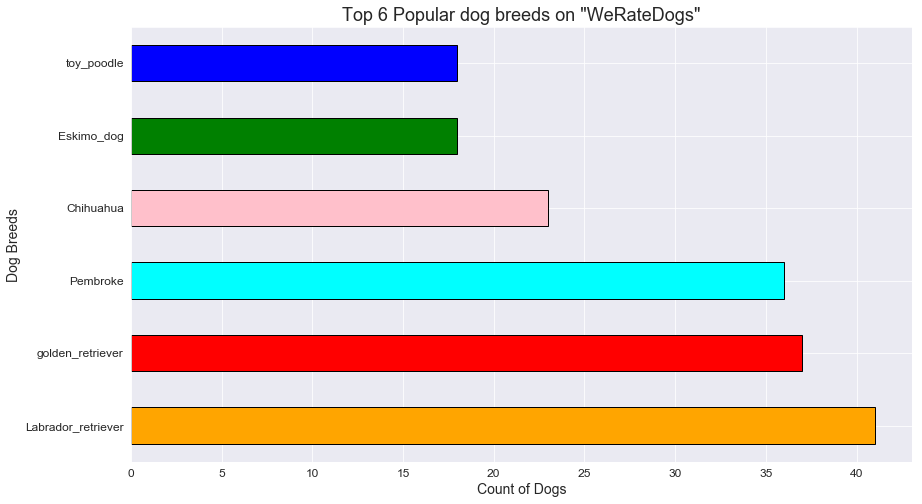

In [96]:
dog_breed = df_master.groupby('1stconfident_dog_breed').filter(lambda x: len(x) >= 18)

sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
dog_breed['1stconfident_dog_breed'].value_counts().plot(kind = 'barh', color=['orange', 'red', 'cyan', 'pink', 'green', 'blue', ], edgecolor='black', fontsize=12)


plt.title('Top 6 Popular dog breeds on "WeRateDogs"', fontsize=18)
plt.xlabel('Count of Dogs', fontsize=14)
plt.ylabel('Dog Breeds', fontsize=14)

fig = plt.gcf() 
fig.savefig('Top6_Dog_Breeds.jpeg',bbox_inches='tight');

Out of the 597 rows of data that are dogs with accurate probability of estimation. It was found that **Labrador_retrievers** are the highest in occurrence with 41 count, followed by **Golden Retriever** (37), **Pembroke** (36), **Chihuahua** (23) and **Eskimo dog** and **Toy poodle** with equal counts of (18).

In [97]:
df_master.shape

(597, 18)

<br>

### Identify what dog stage is mostly posted on WeRateDogs

In [98]:
df_master.stage.value_counts() #list the dog types present

                 510
pupper            49
doggo             26
puppo              6
floofer            3
doggo,pupper       2
doggo,floofer      1
Name: stage, dtype: int64

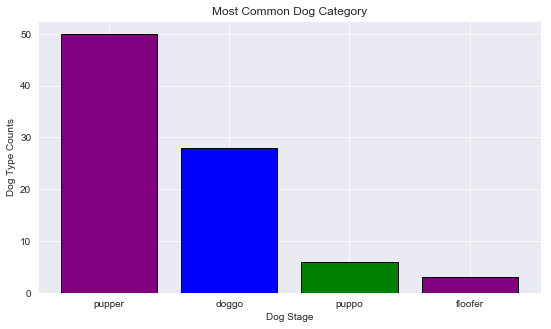

In [99]:
#assign accurate counts for the dog types
dog_stage = ['pupper', 'doggo', 'puppo', 'floofer'] 
dog_stage_counts = [50,28, 6, 3]

fig,ax = plt.subplots(figsize = (9,5))
ax.bar(dog_stage, dog_stage_counts, width = 0.8, color=['purple', 'blue', 'green'], edgecolor='black')
ax.set_ylabel('Dog Type Counts')
ax.set_xlabel('Dog Stage')
plt.title("Most Common Dog Category")
plt.show()

fig.savefig('Dog_types.png')


Most values do not fall under any category, and are missing but the dog stage following so is a pupper with 49 count, doggo with 26, followed by puppo being 6 and floofer only having 3. There were categories in which doggo+pupper and doggo+floofer were identified. The values have been added to individual groups. Graph indicating us that pupper have the highest popularity in the account.

<br>

## Examining Dog Ratings

### > Determining the most frequent rating at "WeRateDogs" Twitter Page

In [100]:
# copy of df_master with only columns we need
time_df = df_master[['timestamp', 'retweet_count', 'favorite_count',
                    'rating_numerator', 'rating_denominator']].copy()

### Define
We need to start off by creating a column with rating ratios and rating percentages, in order to graph and identify the trends

### Code

In [101]:
# Create rating_ration var by dividing the rating numerator
time_df['rating_dog_ratio'] = df_master['rating_numerator'] / df_master['rating_denominator']

In [102]:
#lets create new column for rating percentage, for plotting
time_df['rating_percentage'] = time_df['rating_dog_ratio']*100
time_df['rating_percentage'] = time_df['rating_percentage'].astype(int)

### Test

In [103]:
print(time_df.info()); time_df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 596
Data columns (total 7 columns):
timestamp             597 non-null object
retweet_count         597 non-null int64
favorite_count        597 non-null int64
rating_numerator      597 non-null float64
rating_denominator    597 non-null float64
rating_dog_ratio      597 non-null float64
rating_percentage     597 non-null int32
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 35.0+ KB
None


,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_dog_ratio,rating_percentage
0,2017-07-29 16:00:24 +0000,9028,39064,12.0,10.0,1.2,120


In [104]:
#arranging timestamp from earliest to latest
time_df = time_df.sort_values(by='timestamp')

### Define
Fix timestamp information for easier plotting 

### Code
we need to clean the extra time information, as it will look clustered on a plot; easiest way is to remove the string characters

In [105]:
time_df['timestamp'].head() 

596    2015-11-15 22:32:08 +0000
595    2015-11-16 00:24:50 +0000
594    2015-11-16 01:52:02 +0000
593    2015-11-16 01:59:36 +0000
592    2015-11-16 02:38:37 +0000
Name: timestamp, dtype: object

In [106]:
#removing 14 characters from end, so format will show as year/month/date
time_df['timestamp'] = time_df['timestamp'].map(lambda x: str(x)[:-14]) 

### Test

In [107]:
time_df['timestamp'].head() #looking good

596    2015-11-15 
595    2015-11-16 
594    2015-11-16 
593    2015-11-16 
592    2015-11-16 
Name: timestamp, dtype: object

In [108]:
time_df.head()

,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_dog_ratio,rating_percentage
596,2015-11-15,493,2506,8.0,10.0,0.8,80
595,2015-11-16,41,104,5.0,10.0,0.5,50
594,2015-11-16,57,141,9.0,10.0,0.9,90
593,2015-11-16,157,315,10.0,10.0,1.0,100
592,2015-11-16,43,112,6.0,10.0,0.6,60


---

In [109]:
#lets check the count for ratings

count_ratio = pd.DataFrame(time_df['rating_numerator'].value_counts())
count_ratio

,rating_numerator
12.0,152
11.0,138
10.0,127
13.0,95
9.0,38
8.0,21
7.0,7
6.0,7
14.0,5
4.0,3


In [110]:
df_clean.rating_numerator.mean()

11.749257200606367

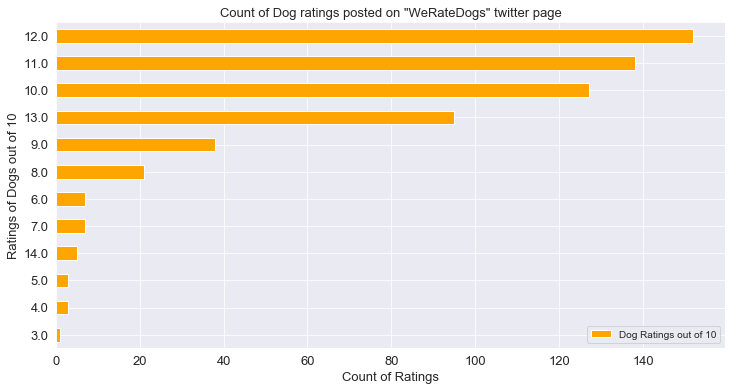

In [111]:
#sns.set_style("dark") #sets background darker

count_ratio.sort_values(by='rating_numerator',ascending = True, inplace = True) #assorting values from high to low

plotG = count_ratio.plot.barh(fontsize = 13, color='orange') #barh = horizontal bar graph

#Title and axis labelling
pltG_label= ['Dog Ratings out of 10']
plt.legend(pltG_label, loc='lower right')

plt.title('Count of Dog ratings posted on "WeRateDogs" twitter page', size=13)
plotG.set_xlabel('Count of Ratings', fontsize = '13')
plotG.set_ylabel('Ratings of Dogs out of 10', fontsize = '13')

#adjusting plot size
plotG.figure.set_size_inches(12, 6)
plt.savefig('Dog_ratings.jpeg')
plt.show()



Graph above indicates us that the 12/10 is the most common rating for a dog followed by 11/10; <br>Very few data points are actually below the denominator value of 10.

<br>

### > Rating Percentage of Dogs over time

C:\Users\deepa\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


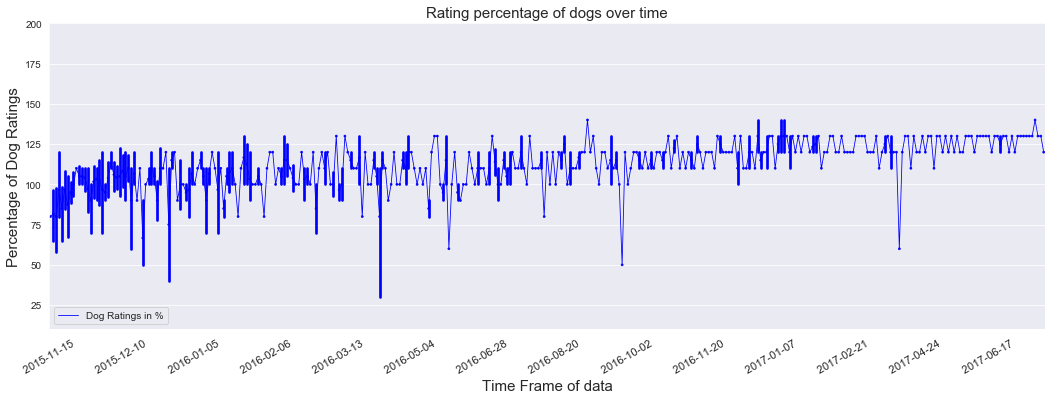

In [112]:
with sns.axes_style('darkgrid'): 
    g = sns.factorplot(x="timestamp", y="rating_percentage", data=time_df, aspect=3,
                    color='blue', scale=0.3)
    plt.ylim(10, 200)
    g.set_xticklabels(rotation=30, step=25, size=11)
    
    l_label = ['Dog Ratings in %']
    plt.legend(l_label, loc='lower left')
    plt.title('Rating percentage of dogs over time', size=15)
    plt.ylabel('Percentage of Dog Ratings', size=15)
    plt.xlabel('Time Frame of data', size=15);

plt.savefig('Rating_over_time.jpeg')
plt.show()

In [113]:
time_df['rating_percentage'].mean()

109.68174204355108

In [114]:
time_df.sort_index (ascending=True)#Nov-15-2015; July 29,, 2017

,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_dog_ratio,rating_percentage
0,2017-07-29,9028,39064,12.0,10.0,1.2,120
1,2017-07-28,1984,11471,13.0,10.0,1.3,130
2,2017-07-28,18173,63310,13.0,10.0,1.3,130
3,2017-07-27,4116,27006,13.0,10.0,1.3,130
4,2017-07-26,7105,30937,14.0,10.0,1.4,140
5,2017-07-25,4796,26998,13.0,10.0,1.3,130
6,2017-07-24,5189,24492,13.0,10.0,1.3,130
7,2017-07-22,4128,24795,13.0,10.0,1.3,130
8,2017-07-22,3405,19235,13.0,10.0,1.3,130
9,2017-07-18,10054,32658,13.0,10.0,1.3,130


As above graph shows, the dog ratings have not been drastic in changes but we can see a gradual increase in DogRatings per posts. The mean of all the data indicates to be 109, which is still higher than 100% in ratings

<br>

### > Retweet/Favourite activity of page over time

creating a new dataframe where timestamp is the index, in order to plot graphs over time

In [115]:
new_index_df = time_df.set_index('timestamp').sort_values(by='timestamp')
new_index_df.head() #setting index to timestamp so plotting has timestamp for x-axis

,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_dog_ratio,rating_percentage
timestamp,,,,,,
2015-11-15,493,2506,8.0,10.0,0.8,80
2015-11-16,41,104,5.0,10.0,0.5,50
2015-11-16,57,141,9.0,10.0,0.9,90
2015-11-16,157,315,10.0,10.0,1.0,100
2015-11-16,43,112,6.0,10.0,0.6,60


In [116]:
new_index_df.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,rating_dog_ratio,rating_percentage
count,597.000000,597.000000,597.000000,597.0,597.000000,597.000000
mean,2540.170854,8839.871022,10.968174,10.0,1.096817,109.681742
std,4557.529599,12543.089576,1.664067,0.0,0.166407,16.640672
min,19.000000,99.000000,3.000000,10.0,0.300000,30.000000
25%,614.000000,2118.000000,10.000000,10.0,1.000000,100.000000
50%,1307.000000,4309.000000,11.000000,10.0,1.100000,110.000000
75%,2946.000000,11311.000000,12.000000,10.0,1.200000,120.000000
max,60989.000000,138356.000000,14.000000,10.0,1.400000,140.000000


In [117]:
new_index_df.retweet_count.sort_values(ascending=False)[:5]

timestamp
2016-06-04     60989
2017-01-21     46948
2017-01-11     39531
2017-01-07     29236
2016-11-07     25759
Name: retweet_count, dtype: int64

In [118]:
new_index_df.favorite_count.sort_values(ascending=False)[:5]

timestamp
2017-01-21     138356
2016-06-04     119787
2017-01-11      91078
2017-07-12      75032
2017-05-10      73783
Name: favorite_count, dtype: int64

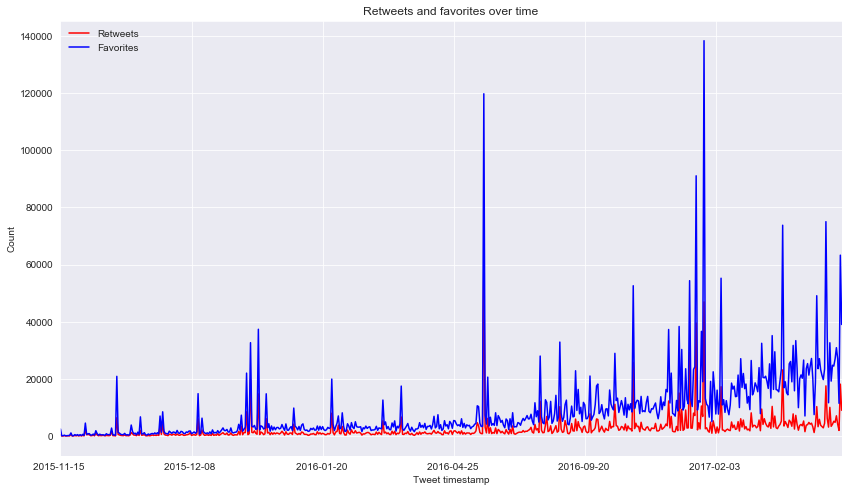

In [119]:
plt.figure(figsize=(14, 8))

new_index_df['retweet_count'].plot(color = 'red', x='timestamp', label='Retweets')
new_index_df['favorite_count'].plot(color = 'blue', x='timestamp', label='Favorites')

plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()


There are certain outliers present in this dataset, especially for the Favourite count with max being 119,787 but mean is only of 8,569.29. Visually we can see that the twitter page has been catching more traffic as the Retweets and Favourites have been increasing over time. The point of increase in traffic occurs soon after the outlier, indicating that the viral post has bought more traffic and increased user interaction with "WeRateDogs" twitter page.